In [10]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def load_column_to_numpy(file_name, column_name):
    with open(file_name, 'r') as f:
        reader = csv.reader(f)
        headers = next(reader)
        column_index = headers.index(column_name)
        data = [int(row[column_index]) for row in reader if row[column_index].isdigit()]
    return np.array(data)

file_path = "russia_losses_equipment.csv"
apc_data = load_column_to_numpy(file_path, "APC")
print("Перші 10 значень стовпця APC:", apc_data[:10])


Перші 10 значень стовпця APC: [19707 19675 19675 19644 19616 19596 19589 19571 19535 19518]


In [11]:
def calculate_daily_losses(apc_array):
    daily_losses = np.diff(apc_array)
    return daily_losses

daily_losses_apc = calculate_daily_losses(apc_data)
print("Перші 10 значень добових втрат БТР:", daily_losses_apc[:10])


Перші 10 значень добових втрат БТР: [-32   0 -31 -28 -20  -7 -18 -36 -17 -46]


In [12]:
def top_n_losses(daily_losses, n=5):
    return np.sort(daily_losses)[-n:][::-1]

top_losses = top_n_losses(daily_losses_apc)
print("5 найбільших добових втрат БТР:", top_losses)


5 найбільших добових втрат БТР: [14  0  0  0  0]


In [13]:
def losses_in_summer_2024(apc_array, start_date="2022-02-24"):
    days_from_start = (2024 - 2022) * 365 + 150
    summer_start = days_from_start + 1
    summer_end = summer_start + 90

    summer_losses = apc_array[summer_end] - apc_array[summer_start]
    return summer_losses

summer_losses = losses_in_summer_2024(apc_data)
print("Загальні втрати БТР влітку 2024 року:", summer_losses)


Загальні втрати БТР влітку 2024 року: -1823


In [14]:
def average_losses_in_range(daily_losses, start_day=100, end_day=500):
    return np.mean(daily_losses[start_day:end_day])

average_losses = average_losses_in_range(daily_losses_apc)
print("Середні добові втрати БТР за 100-500 дні:", average_losses)


Середні добові втрати БТР за 100-500 дні: -21.61


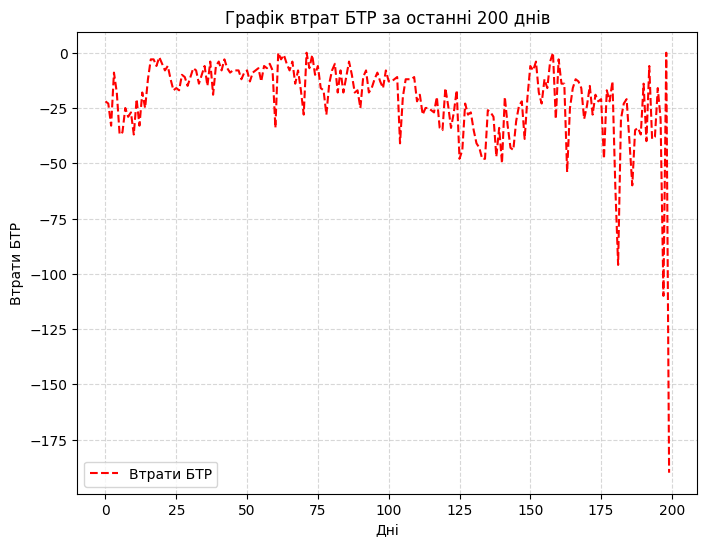

In [15]:
def plot_last_200_days_losses(daily_losses):
    last_200_days = daily_losses[-200:]
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(last_200_days, linestyle='--', color='red', label='Втрати БТР')
    plt.title("Графік втрат БТР за останні 200 днів")
    plt.xlabel("Дні")
    plt.ylabel("Втрати БТР")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.savefig("apc_losses_last_200_days.png")
    plt.show()

plot_last_200_days_losses(daily_losses_apc)
